# FairPrep Usage (unit example)

> This is a quick demo to use FairPrep to build a pipeline on a dataset. The pipeline includes preprocessing steps, a classifier, and some fairness interventions.

### Step 1 import packages

In [2]:
import sys
sys.path.insert(0,'../')

import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import warnings
warnings.filterwarnings("ignore")
from FairPrep.preprocess.splitters import *
from FairPrep.preprocess.samplers import *
from FairPrep.preprocess.imputers import *
from FairPrep.preprocess.scalers import *
from FairPrep.preprocess.categorizers import *
from FairPrep.preprocess.encoders import *
from FairPrep.preprocess.fair_preprocessors import *
from FairPrep.model.classifiers import *
from FairPrep.postprocess.fair_postprocessors import *
from FairPrep.pipeline import FairPipeline
from FairPrep.stage import *

### Step 2 user-defined parameteres for dataset

In [14]:
# specify the basic descriptive parameters of the input data
data_file = "../data/german_AIF_test.csv"
# the target column name
y_col = "credit"
# the value of the target column that represents the favorable label
y_posi = ["good"]
# the sensitive attributes in the dataset
sensi_atts = ["age", "sex"]
# the values of the sensitive attributes that represent the protected group, e.g. female for gender, Black for race.
protected_groups = {"age": "young", "sex": "female"}
# the numerical mapping of the values of the sensitive attributes and the target column
value_mapping = {"female": 0, "male": 1, "good": 1, "bad": 0, "young": 0, "old": 1}
# the name of the binary sensitive attribute to be used in fairness intervention. Note that the fairness intervention only works with a single binary sensitive attribute.
debias_focus_att = "sex"

# the list of numerical attributes in the dataset for the purpose of integrity checks
numerical_atts = ["month", "credit_amount"]
# the list of categorical attributes in the dataset without the sensitive attributes for the purpose of integrity checks
categorical_atts = ["status", "employment", "housing"]





Default values set here, change here if needed.

In [11]:
# the value of the seed that will be used as the global seed in the FairPrep pipeline
global_seed = 0

# the list of sizes for each split of the dataset. The split datasets are train, validation and test datasets. 
# E.g. [0.5, 0.3, 0.2] represents the sizes of the train, validation and test datasets are 50%, 30%, 20% of the raw dataset.
split_ratios = [0.5, 0.3, 0.2]

### Step 3 specify the stages inside a FairPrep pipeline

1. Instantiate three stage builders: preprocess stage builder, model stage builder, and postprocess stage builder.
2. Specify each step inside the above three stages.

In [12]:
# initialize each stage obejct in order to build a fair pipeline
preprocess_stage = PreprocessStageBuilder()
model_stage = ModelStageBuilder()
postprocess_stage = PostprocessStageBuilder()

# specify the method for each preprocessing step
preprocess_stage.setSplitter(RandomSplitter(split_ratios, global_seed))
preprocess_stage.setSampler(NoSampler())
preprocess_stage.setImputer(NoImputer())
preprocess_stage.setScaler(SK_MinMaxScaler(numerical_atts))
preprocess_stage.setCategorizer(NoBinarizer())
preprocess_stage.setEncoder(OneHotEncoder(categorical_atts))
preprocess_stage.setMappingEncoder(MappingEncoder([y_col] + sensi_atts, value_mapping))
preprocess_stage.setFairPreprocessor(AIF_Reweighing(y_col, debias_focus_att))

# specify the method for the model step
model_stage.setModel(OPT_LogisticRegression(y_col, global_seed))

# specify the method for the postprocessor step
postprocess_stage.setPostprocessor(NoFairPostprocessor())

### Step 4 build and run a fairprep pipeline

1. Build the FairPrep pipeline using above three stage builders.
2. Run the pipeline on above dataset.

In [15]:
# initialize a fair prep object using the above data descriptive parameters
fairprep_builder = FairPrepBuilder(data_file=data_file, target_col=y_col, positive_target_value=y_posi,
                           sensitive_attributes=sensi_atts, protected_groups=protected_groups, special_value_mapping=value_mapping,
                           debias_attribute=debias_focus_att, numerical_atts=numerical_atts, categorical_atts=categorical_atts,
                           seed=global_seed, verbose=True)


# set each stage using above stages
fairprep_builder.setPreprocessStage(preprocess_stage_builder=preprocess_stage)
fairprep_builder.setModelStage(model_stage_builder=model_stage)
fairprep_builder.setPostprocessStage(postprocess_stage_builder=postprocess_stage)

# run the pipeline that is built from the steps specified in above three stages
train_after, val_after, test_after = fairprep_builder.runPipeline(save_interdata=True)

(step 1 of 10) running RandomSplitter

(step 2 of 10) running NoSampler

Data is saved to  /Users/keyang/PrivGithub/FairPrep/logs/2020-08-14_15-06-00-399__german_AIF_test/RS_NS-0-train.csv
Data is saved to  /Users/keyang/PrivGithub/FairPrep/logs/2020-08-14_15-06-00-399__german_AIF_test/RS_NS-0-val.csv
Data is saved to  /Users/keyang/PrivGithub/FairPrep/logs/2020-08-14_15-06-00-399__german_AIF_test/RS_NS-0-test.csv


(step 3 of 10) running NoImputer

Data is saved to  /Users/keyang/PrivGithub/FairPrep/logs/2020-08-14_15-06-00-399__german_AIF_test/RS_NS_NI-0-train.csv
Data is saved to  /Users/keyang/PrivGithub/FairPrep/logs/2020-08-14_15-06-00-399__german_AIF_test/RS_NS_NI-0-val.csv
Data is saved to  /Users/keyang/PrivGithub/FairPrep/logs/2020-08-14_15-06-00-399__german_AIF_test/RS_NS_NI-0-test.csv


(step 4 of 10) running MinMaxScaler

Data is saved to  /Users/keyang/PrivGithub/FairPrep/logs/2020-08-14_15-06-00-399__german_AIF_test/RS_NS_NI_MS-0-train.csv
Data is saved to  /Users/keyang

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished


Data is saved to  /Users/keyang/PrivGithub/FairPrep/logs/2020-08-14_15-06-00-399__german_AIF_test/RS_NS_NI_MS_NB_HE_ME_RW_OLR-0-train.csv
Data is saved to  /Users/keyang/PrivGithub/FairPrep/logs/2020-08-14_15-06-00-399__german_AIF_test/RS_NS_NI_MS_NB_HE_ME_RW_OLR-0-val.csv
Data is saved to  /Users/keyang/PrivGithub/FairPrep/logs/2020-08-14_15-06-00-399__german_AIF_test/RS_NS_NI_MS_NB_HE_ME_RW_OLR-0-test.csv


(step 10 of 10) running NoPostprocessor

Data is saved to  /Users/keyang/PrivGithub/FairPrep/logs/2020-08-14_15-06-00-399__german_AIF_test/RS_NS_NI_MS_NB_HE_ME_RW_OLR_NP-0-train.csv
Data is saved to  /Users/keyang/PrivGithub/FairPrep/logs/2020-08-14_15-06-00-399__german_AIF_test/RS_NS_NI_MS_NB_HE_ME_RW_OLR_NP-0-val.csv
Data is saved to  /Users/keyang/PrivGithub/FairPrep/logs/2020-08-14_15-06-00-399__german_AIF_test/RS_NS_NI_MS_NB_HE_ME_RW_OLR_NP-0-test.csv


==> Evaluation results are stored in  /Users/keyang/PrivGithub/FairPrep/logs/2020-08-14_15-06-00-399__german_AIF_test/Metric

### Step 5 visualize the performance on each split datasets (optional)

FairPrep computes the frequently used evaluation metrics, such as performance metric accuracy and fairness-involved metric selection rate. The results of the evaluation metrics are stored in the file "Metrics-GLOABAL_SEED-DATASET.csv" inside the corresponding log folder under the root folder "logs/". For example, the results for train dataset for global seed = 0 is stored as "Metrics-0-train.csv".

#### 5.1 visualize the two metrics on the dataset

It needs two as inputs to draw the scatter plot.

In [27]:
# the name of the metric on X axis
metric_on_x = "selection_rate"
# the name of the metric on Y axis
metric_on_y = "accuracy"

In [38]:
# read the results of metrics on each split
res_df = pd.DataFrame(columns=["split", metric_on_x, metric_on_y, "PrivilegedStatus"])
for split_i in ["train", "val", "test"]:
    cur_res = pd.read_csv(fairprep_builder.engine.log_dir_name + "Metrics-{}-{}.csv".format(global_seed, split_i))
    cur_res = cur_res.fillna(value="ignore")
    for data_i in ["ignore", True, False]:
        metric_res = []
        for metric_i in [metric_on_x, metric_on_y]:
            metric_res.append(cur_res[(cur_res["PrivilegedStatus"]==data_i) & (cur_res["MetricName"]==metric_i)]["MetricValue"].values[0])
        res_df.loc[res_df.shape[0]] = [split_i] + metric_res + [data_i]

In [50]:
def output_scatter_plot(res_df, x_col, y_col, hue_col='PrivilegedStatus', color_p='Set3'):
    '''
        Visualization of the two metrics for the different groups by different colors. 
    '''
    sns.set(style='whitegrid', font_scale=1.5)
    colors = ["greyish", "windows blue", "red"]
    sns.set_palette(sns.color_palette(sns.xkcd_palette(colors)))
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(13, 6))
    sns.scatterplot(x_col, y_col, hue_col, data=res_df.query("split == 'train'"), ax=ax1, s=100, legend=False)
    sns.scatterplot(x_col, y_col, hue_col, data=res_df.query("split == 'val'"), ax=ax2, s=100, legend=False)
    sns.scatterplot(x_col, y_col, hue_col, data=res_df.query("split == 'test'"), ax=ax3, s=100)
    
    ax1.set_title('On train')
    ax2.set_title('On validation')
    ax3.set_title('On test')
    plt.tight_layout()

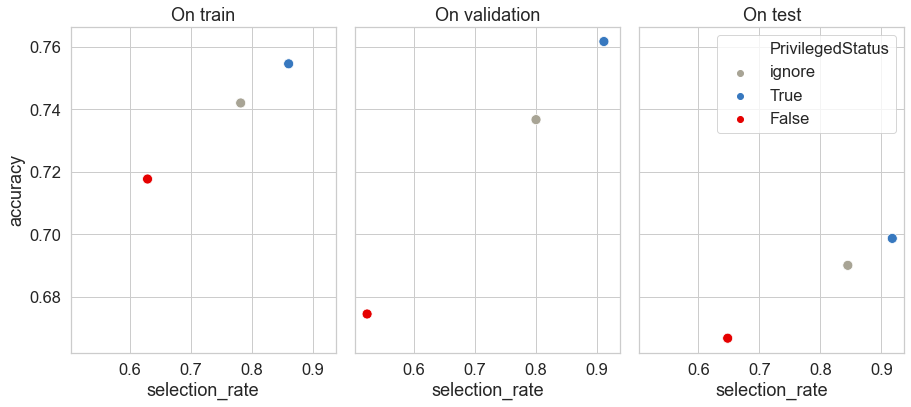

In [51]:
output_scatter_plot(res_df, metric_on_x, metric_on_y)

### Interpret the plots above
The above plot shows that the performance of the pipeline on the input dataset differs for different groups. For example, in above plot, the blue points represent the results of privileged group (e.g. male for gender and White for race) with "PrivilegedStatus=True" on each splits: train, validation and test. The red points represent the results of the unprivileged group (e.g. female for gender and Black for race) with PrivilegedStatus=False" on each splits. And the grey points represent the results of the metrics on X and Y axis on the complete split ignoring the group membership with "PrivilegedStatus=ignore".

We can observe that the accuracy and the selection rate for the unprivileged group are lower than the privileged one and this trend is true on all the splits. The performance for the unprivileged group is even worse than the value on the complete dataset (e.g. grey points). 

> FairPrep helps users to check such imbalanced performane of the pipeline on their own datasets.